In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
data=np.genfromtxt("MultipleLR.csv",delimiter=",")
x1=data[:,0]
x0=np.ones((len(data[:,0]),1))
x3=np.zeros((len(data[:,0]),1))
for i in range(10):
    x3[i]=1
y=data[:,3]
y=y.reshape(-1,1)
x = np.column_stack((x0,x3,data[:,0:3]))
print(x)
print(y)


[[  1.   1.  73.  80.  75.]
 [  1.   1.  93.  88.  93.]
 [  1.   1.  89.  91.  90.]
 [  1.   1.  96.  98. 100.]
 [  1.   1.  73.  66.  70.]
 [  1.   1.  53.  46.  55.]
 [  1.   1.  69.  74.  77.]
 [  1.   1.  47.  56.  60.]
 [  1.   1.  87.  79.  90.]
 [  1.   1.  79.  70.  88.]
 [  1.   0.  69.  70.  73.]
 [  1.   0.  70.  65.  74.]
 [  1.   0.  93.  95.  91.]
 [  1.   0.  79.  80.  73.]
 [  1.   0.  70.  73.  78.]
 [  1.   0.  93.  89.  96.]
 [  1.   0.  78.  75.  68.]
 [  1.   0.  81.  90.  93.]
 [  1.   0.  88.  92.  86.]
 [  1.   0.  78.  83.  77.]
 [  1.   0.  82.  86.  90.]
 [  1.   0.  86.  82.  89.]
 [  1.   0.  78.  83.  85.]
 [  1.   0.  76.  83.  71.]
 [  1.   0.  96.  93.  95.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [111]:
##### stochastic #####
def stochastic (x,y,theta,alpha,max_iterations):
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    l=len(x)-1
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        if l==len(x)-1:
            l=0
        elif l>=0:
            l+=1
        h_theta_new=h_theta[l:l+1,:]
        y_new=y[l:l+1,:]
        x_new=x[l:l+1,:]
        lossfunc=(1/(2))*(( h_theta_new - y_new)**2)
        loss_array.append(float(lossfunc))
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(x_new.T @ z)
        theta-=alpha*gradient_theta
        h_theta = x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1  
    return h_theta,theta,loss_array,epochs,theta0,iterations  

In [112]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00002
max_iterations=1000
h,theta,loss_array,epochs,theta0,iterations=stochastic(x,y,theta,alpha,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 82.782330624938 %
theta [[0.00751848]
 [0.00751848]
 [0.63078038]
 [0.64173735]
 [0.63984284]]
iterations 4


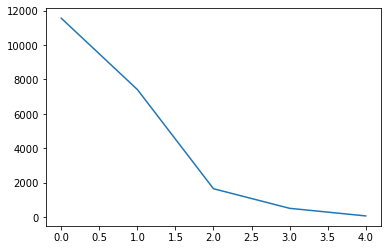

In [113]:
plt.plot(epochs,loss_array)
plt.show()

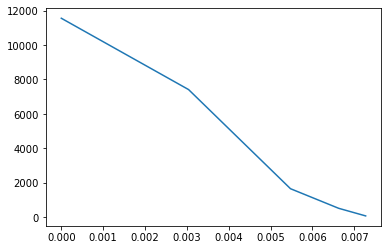

In [114]:
plt.plot(theta0,loss_array)
plt.show()

In [115]:
##### momentum stochastic #####
def momentum_stochastic (x,y,theta,alpha,gama,max_iterations):
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    l=len(x)-1
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    v=np.zeros((len(x[0,:]),1))
    for i in range(max_iterations):
        if l==len(x)-1:
            l=0
        elif l>=0:
            l+=1
        h_theta_new=h_theta[l:l+1,:]
        y_new=y[l:l+1,:]
        x_new=x[l:l+1,:]
        lossfunc=(1/(2))*(( h_theta_new - y_new)**2)
        loss_array.append(float(lossfunc))
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(x_new.T @ z)
        v=gama*v+alpha*gradient_theta
        theta-=v
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.00001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.00001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.00001:
                break
        iterations+=1  
    return h_theta,theta,loss_array,epochs,theta0,iterations  

In [116]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00002
max_iterations=1000
gama=0.9
h,theta,loss_array,epochs,theta0,iterations=momentum_stochastic (x,y,theta,alpha,gama,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 96.7901986707679 %
theta [[ 0.00304793]
 [-0.00608084]
 [ 0.6290038 ]
 [ 0.6822743 ]
 [ 0.74590244]]
iterations 53


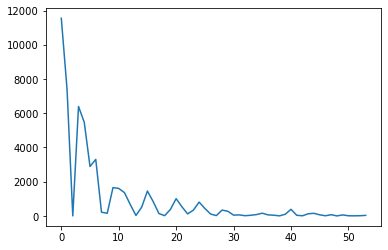

In [117]:
plt.plot(epochs,loss_array)
plt.show()

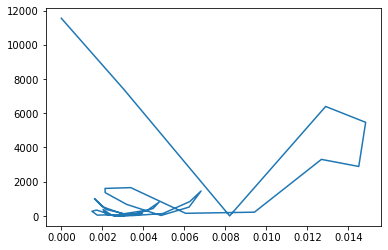

In [118]:
plt.plot(theta0,loss_array)
plt.show()

In [119]:
##### Nesterov stochastic #####
def Nesterov_stochastic (x,y,theta,alpha,gama,max_iterations):
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    l=len(x)-1
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    v=np.zeros((len(x[0,:]),1))
    for i in range(max_iterations):
        if l==len(x)-1:
            l=0
        elif l>=0:
            l+=1
        h_theta_new=h_theta[l:l+1,:]
        y_new=y[l:l+1,:]
        x_new=x[l:l+1,:]
        lossfunc=(1/(2))*(( h_theta_new - y_new)**2)
        loss_array.append(float(lossfunc))
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        theta_temp=theta - gama*v
        h_theta=x @ theta_temp
        h_theta_new=h_theta[l:l+1,:]
        z=h_theta_new- y_new
        gradient_theta_temp=(x_new.T @ z)
        theta=theta_temp-alpha*gradient_theta_temp
        v=gama*v+alpha*gradient_theta_temp
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta_temp])<0.00001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.00001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.00001:
                break
        iterations+=1  
    return h_theta,theta,loss_array,epochs,theta0,iterations  

In [120]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00002
max_iterations=1000
gama=0.9
h,theta,loss_array,epochs,theta0,iterations=Nesterov_stochastic (x,y,theta,alpha,gama,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 97.65149384049714 %
theta [[0.01098762]
 [0.01152071]
 [0.62571931]
 [0.73549257]
 [0.6567295 ]]
iterations 20


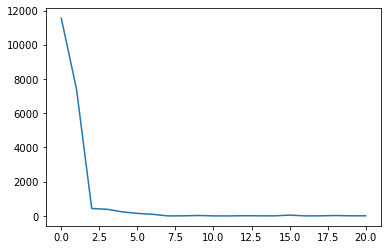

In [121]:
plt.plot(epochs,loss_array)
plt.show()

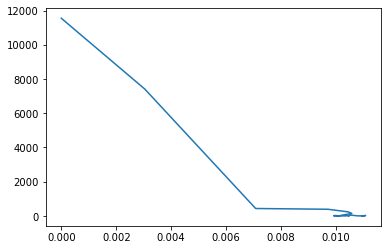

In [122]:
plt.plot(theta0,loss_array)
plt.show()

In [123]:
##### adagrad stochastic #####
def adagrad_stochastic (x,y,theta,alpha,epthlon,max_iterations):
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    l=len(x)-1
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    v=np.zeros((len(x[0,:]),1))
    for i in range(max_iterations):
        if l==len(x)-1:
            l=0
        elif l>=0:
            l+=1
        h_theta_new=h_theta[l:l+1,:]
        y_new=y[l:l+1,:]
        x_new=x[l:l+1,:]
        lossfunc=(1/(2))*(( h_theta_new - y_new)**2)
        loss_array.append(float(lossfunc))
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(x_new.T @ z)
        v=v+gradient_theta**2
        theta-=(alpha/(np.sqrt(v)+epthlon))*gradient_theta
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1  
    return h_theta,theta,loss_array,epochs,theta0,iterations  

In [124]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.2
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=500
h,theta,loss_array,epochs,theta0,iterations=adagrad_stochastic(x,y,theta,alpha,epthlon,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 97.23355498124312 %
iterations 19


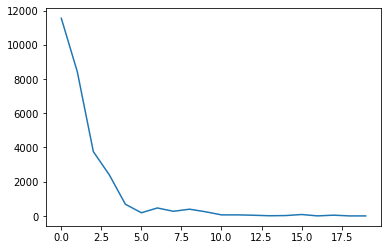

In [125]:
plt.plot(epochs,loss_array)
plt.show()

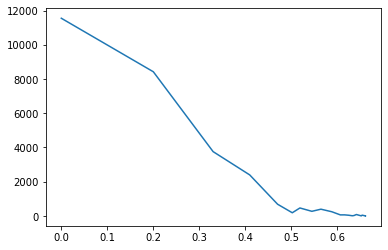

In [126]:
plt.plot(theta0,loss_array)
plt.show()

In [127]:
##### RMSprop stochastic #####
def RMSprop_stochastic (x,y,theta,alpha,beta,epthlon,max_iterations):
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    l=len(x)-1
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    v=np.zeros((len(x[0,:]),1))
    for i in range(max_iterations):
        if l==len(x)-1:
            l=0
        elif l>=0:
            l+=1
        h_theta_new=h_theta[l:l+1,:]
        y_new=y[l:l+1,:]
        x_new=x[l:l+1,:]
        lossfunc=(1/(2))*(( h_theta_new - y_new)**2)
        loss_array.append(float(lossfunc))
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(x_new.T @ z)
        v=beta*v+(1-beta)*(gradient_theta**2)
        theta-=(alpha/(np.sqrt(v)+epthlon))*gradient_theta
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1  
    return h_theta,theta,loss_array,epochs,theta0,iterations  

In [128]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.2
beta=0.9
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=1000
batch_size=5
h,theta,loss_array,epochs,theta0,iterations=RMSprop_stochastic(x,y,theta,alpha,beta,epthlon,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 95.97444088011778 %
iterations 5


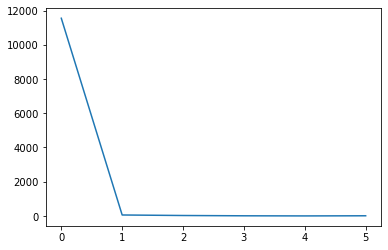

In [129]:
plt.plot(epochs,loss_array)
plt.show()

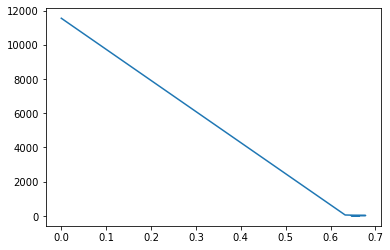

In [130]:
plt.plot(theta0,loss_array)
plt.show()

In [131]:
##### RMSprop stochastic #####
def adam_stochastic (x,y,theta,alpha,beta,gama,epthlon,max_iterations):
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    l=len(x)-1
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    v_adam=np.zeros((len(x[0,:]),1))
    m_adam=np.zeros((len(x[0,:]),1))
    for i in range(max_iterations):
        if l==len(x)-1:
            l=0
        elif l>=0:
            l+=1
        h_theta_new=h_theta[l:l+1,:]
        y_new=y[l:l+1,:]
        x_new=x[l:l+1,:]
        lossfunc=(1/(2))*(( h_theta_new - y_new)**2)
        loss_array.append(float(lossfunc))
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(x_new.T @ z)
        v_adam=beta*v_adam+(1-beta)*gradient_theta**2
        v_adam=v_adam/(1-(beta**(iterations+1)))
        m_adam=gama*m_adam+(1-gama)*gradient_theta
        m_adam=m_adam/(1-(gama**(iterations+1)))
        theta-=(alpha/(np.sqrt(v_adam)+epthlon))*m_adam
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1  
    return h_theta,theta,loss_array,epochs,theta0,iterations  

In [132]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.5
beta=0.95
gama=0.5
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=1000
h,theta,loss_array,epochs,theta0,iterations=adam_stochastic(x,y,theta,alpha,beta,gama,epthlon,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 94.56769819789093 %
iterations 6


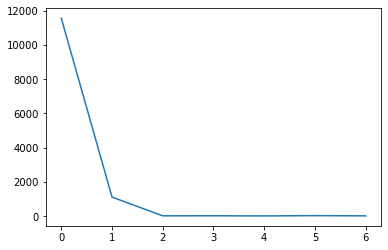

In [133]:
plt.plot(epochs,loss_array)
plt.show()

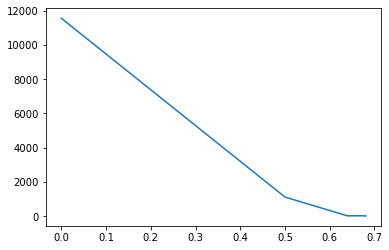

In [134]:
plt.plot(theta0,loss_array)
plt.show()